# 지하철 시간대별 승하차 비율 분석을 통한 주거지/업무지 분포 추정 보고서

## 1. 프로젝트 개요
- 분석 목적 : 지하철역별 출퇴근 시간 승하차 패턴을 분석하여, 서울 시민의 주거지와 업무지의 공간적 분포를 추정하고, 이에 따른 교통 혼잡 개선 방향을 제시
- 데이터 출처 : 서울 열린데이터 광장
- 분석 대상 변수:
    - 07시-08시 승차인원, 07시-08시 하차인원
    - 08시-09시 승차인원, 08시-09시 하차인원
    - 17시-18시 승차인원, 17시-18시 하차인원
    - 18시-19시 승차인원, 18시-19시 하차인원
    - 호선명
    - 지하철역
    - 작업일자

In [90]:
import pandas as pd

df = pd.read_csv("./data/Seoul_Subways_time.csv", encoding='cp949')

# 기본 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74277 entries, 0 to 74276
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           74277 non-null  int64 
 1   호선명           74277 non-null  object
 2   지하철역          74277 non-null  object
 3   04시-05시 승차인원  74277 non-null  int64 
 4   04시-05시 하차인원  74277 non-null  int64 
 5   05시-06시 승차인원  74277 non-null  int64 
 6   05시-06시 하차인원  74277 non-null  int64 
 7   06시-07시 승차인원  74277 non-null  int64 
 8   06시-07시 하차인원  74277 non-null  int64 
 9   07시-08시 승차인원  74277 non-null  int64 
 10  07시-08시 하차인원  74277 non-null  int64 
 11  08시-09시 승차인원  74277 non-null  int64 
 12  08시-09시 하차인원  74277 non-null  int64 
 13  09시-10시 승차인원  74277 non-null  int64 
 14  09시-10시 하차인원  74277 non-null  int64 
 15  10시-11시 승차인원  74277 non-null  int64 
 16  10시-11시 하차인원  74277 non-null  int64 
 17  11시-12시 승차인원  74277 non-null  int64 
 18  11시-12시 하차인원  74277 non-null  int64 
 19  12시-

In [ ]:
# 데이터 샘플 보기
df.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202505,1호선,동대문,695,16,11411,1920,9784,7385,16724,...,9851,903,3141,8,284,0,0,0,0,20250603
1,202505,1호선,동묘앞,148,3,2859,986,4018,5686,8874,...,4711,135,2029,3,178,0,0,0,0,20250603
2,202505,1호선,서울역,688,67,10783,10374,28788,65184,90177,...,32808,4299,8636,18,174,0,0,0,0,20250603
3,202505,1호선,시청,121,3,1938,5755,3754,27708,7542,...,3883,558,899,0,32,0,0,0,0,20250603
4,202505,1호선,신설동,414,32,9502,2362,10403,9078,22203,...,9707,444,3017,0,0,0,0,0,0,20250603


## 2. 데이터 전처리

In [91]:
missing_count = df.isnull().sum()
#결측치는 없는 것을 확인
missing_count[missing_count > 0]

Series([], dtype: int64)

In [92]:
# 필요없는 데이터 제거

# 출퇴근 시간대의 데이터만 사용
df_keep = ['사용월', '호선명', '지하철역', '07시-08시 승차인원', '07시-08시 하차인원', '08시-09시 승차인원', '08시-09시 하차인원',\
            '17시-18시 승차인원','17시-18시 하차인원','18시-19시 승차인원','18시-19시 하차인원', '작업일자']
subways_df = df[df_keep]
# 최근 5년간의 데이터만 사용
subways_df = subways_df[subways_df['사용월'] >= 202001]

In [19]:
#폰트 지정
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Hancom Gothic'
rcParams['axes.unicode_minus'] = False

## 3. 탐색적 데이터 분석 (EDA)

In [43]:
subways_df.groupby('지하철역')['07시-08시 승차인원'].describe().sort_values('mean',ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
지하철역,,,,,,,,
구로디지털단지,65.0,131361.446154,11890.082594,99710.0,124041.00,133096.0,140436.0,151803.0
서울대입구(관악구청),65.0,119738.938462,10650.413786,91257.0,112846.00,121903.0,128349.0,138735.0
신림,102.0,118948.598039,87860.473969,352.0,4402.25,173535.0,186471.5,217412.0
쌍문,65.0,118533.430769,9686.885764,94029.0,111826.00,120597.0,126035.0,137926.0
까치산,65.0,116967.092308,10124.233108,91796.0,109227.00,119807.0,124148.0,136255.0
역곡,65.0,111747.661538,8940.719557,89543.0,104946.00,113340.0,118161.0,128743.0
화곡,65.0,109563.584615,9840.795031,85383.0,102161.00,111603.0,115986.0,128489.0
수유(강북구청),65.0,106764.738462,9324.142533,83692.0,100164.00,109041.0,113622.0,124584.0
송내,65.0,102359.353846,8878.366310,78803.0,96231.00,104314.0,109133.0,120100.0


In [46]:
subways_df.groupby('지하철역')['08시-09시 승차인원'].describe().sort_values('mean',ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
지하철역,,,,,,,,
신림,102.0,178113.588235,131216.248670,576.0,7040.75,258908.5,278345.00,323248.0
구로디지털단지,65.0,175572.923077,13971.274589,138972.0,164557.00,179261.0,185427.00,201815.0
서울대입구(관악구청),65.0,169540.476923,12494.777861,137157.0,162572.00,172422.0,177042.00,196629.0
까치산,65.0,146391.507692,10806.037353,120806.0,139289.00,148213.0,154452.00,167412.0
화곡,65.0,139599.784615,11461.771840,112350.0,130794.00,142462.0,149208.00,161580.0
신대방,65.0,125445.876923,9909.807274,100366.0,118517.00,127476.0,132899.00,143556.0
낙성대,2.0,124638.500000,4806.204792,121240.0,122939.25,124638.5,126337.75,128037.0
쌍문,65.0,123711.076923,8898.033816,96253.0,117938.00,123122.0,131162.00,138634.0
낙성대(강감찬),63.0,119446.587302,9929.324418,95826.0,111530.00,122371.0,127148.50,136581.0


아침 출근시간을 7~8시, 8~9시로 나누어 승차하는 사람들이 많은 역을 상위 10위건만 보았을때<br>
신림, 구로디지털단지, 서울대입구(관악구청), 까치산, 화곡, 쌍문, 수유(강북구청)이 중복으로 나오는 것을 알 수 있다.<br>
이를 통해 이 지역에 거주하는 사람들이 많은것으로 예측해 볼 수 있다.

In [47]:
subways_df.groupby('지하철역')['07시-08시 하차인원'].describe().sort_values('mean',ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
지하철역,,,,,,,,
강남,65.0,143580.846154,14208.974465,106237.0,134771.0,143385.0,153487.00,175071.0
역삼,65.0,134290.369231,20446.600108,96855.0,117264.0,136190.0,150509.00,180733.0
여의도,130.0,130809.038462,17267.758395,95608.0,118151.0,132075.0,141933.75,172613.0
삼성(무역센터),65.0,126801.276923,15696.846399,91970.0,115581.0,127871.0,139609.00,161460.0
을지로입구,65.0,116656.661538,13790.943842,84107.0,105625.0,117998.0,125680.00,146000.0
양재(서초구청),65.0,101550.307692,9447.343395,76906.0,93315.0,103587.0,108562.00,122615.0
종각,65.0,98611.307692,13544.512253,68967.0,90183.0,98742.0,110276.00,127188.0
가산디지털단지,130.0,87542.469231,37116.183697,39993.0,52734.0,79755.5,121709.75,165279.0
안국,65.0,84701.184615,11343.668819,54540.0,77418.0,86573.0,91130.00,106742.0


In [48]:
subways_df.groupby('지하철역')['08시-09시 하차인원'].describe().sort_values('mean',ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
지하철역,,,,,,,,
역삼,65.0,333375.230769,39070.263347,254248.0,306947.0,338952.0,361101.0,417350.0
삼성(무역센터),65.0,310656.507692,33637.383700,240373.0,284267.0,320875.0,333713.0,373919.0
을지로입구,65.0,301578.784615,40368.575061,225150.0,270348.0,312715.0,332467.0,374916.0
강남,65.0,297869.861538,23483.918098,244108.0,280477.0,299804.0,310431.0,362109.0
가산디지털단지,130.0,257206.223077,112810.103265,122518.0,148307.5,236711.5,368729.5,425384.0
광화문(세종문화회관),65.0,252229.815385,28028.934844,175843.0,236957.0,256202.0,271908.0,301296.0
성수,65.0,249242.138462,17684.774272,211994.0,234744.0,251619.0,262572.0,287267.0
종각,65.0,233731.507692,36246.719528,161487.0,209115.0,243983.0,263411.0,302766.0
구로디지털단지,65.0,228051.661538,19020.635606,194238.0,215378.0,225606.0,242622.0,272134.0


아침 출근시간을 7~8시, 8~9시로 나누어 하차하는 사람들이 많은 역을 상위 10위건만 보았을때<br>
역삼, 강남, 삼성(무역센터), 을지로입구, 가산디지털단지, 종각, 양재(서초구청), 구로디지털단지가 중복으로 나오는 것을 알 수 있다.<br>
이를 통해 이 지역에 출근하는 사람들이 많은것으로 예측해 볼 수 있다.

In [49]:
subways_df.groupby('지하철역')['17시-18시 승차인원'].describe().sort_values('mean',ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
지하철역,,,,,,,,
강남,65.0,233291.846154,21697.048484,186459.0,222903.0,235344.0,250437.0,277252.0
삼성(무역센터),65.0,197555.615385,35259.511616,133116.0,165534.0,200368.0,226760.0,260804.0
역삼,65.0,194786.507692,29338.825758,140442.0,170575.0,198097.0,218143.0,256208.0
을지로입구,65.0,149764.384615,24386.571142,103561.0,127809.0,147858.0,171843.0,191987.0
여의도,130.0,132442.753846,24938.282406,87068.0,108313.0,137265.5,150702.0,186101.0
종각,65.0,131607.492308,23254.827556,87165.0,111891.0,137137.0,152841.0,168100.0
가산디지털단지,130.0,127197.261538,64137.174622,48554.0,66926.0,115617.0,190385.0,239011.0
구로디지털단지,65.0,125577.846154,12005.994979,98716.0,118200.0,129318.0,134357.0,144922.0
성수,65.0,121564.246154,29962.876819,80198.0,94949.0,119084.0,144608.0,187601.0


In [50]:
subways_df.groupby('지하철역')['18시-19시 승차인원'].describe().sort_values('mean',ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
지하철역,,,,,,,,
강남,65.0,313642.138462,23652.770448,259909.0,299117.0,314131.0,327013.0,391365.0
삼성(무역센터),65.0,282114.753846,33036.062195,214260.0,258651.0,289684.0,307149.0,335875.0
역삼,65.0,264321.923077,23277.646374,217710.0,245176.0,271096.0,279053.0,316517.0
을지로입구,65.0,252530.092308,34655.928404,184791.0,219976.0,261219.0,280389.0,307138.0
성수,65.0,227628.907692,29919.079069,175769.0,202130.0,230757.0,247234.0,287722.0
구로디지털단지,65.0,205989.307692,17168.642865,173847.0,193221.0,206689.0,217942.0,245542.0
광화문(세종문화회관),65.0,202153.015385,21433.326988,148740.0,188607.0,205293.0,217598.0,237035.0
가산디지털단지,130.0,200884.676923,97161.771166,86890.0,105752.0,185617.5,295377.0,341246.0
종각,65.0,197852.400000,25871.479165,139737.0,176710.0,203922.0,218033.0,242452.0


위의 아침시간 하차 인원수와 저녘시간 승차 인원수를 비교해봤을때 더욱 극명해지는데<br>
강남, 삼성(무역센터), 역삼, 을지로입구, 가산디지털단지, 구로디지털단지, 종각, 양재(서초구청)이 중복되게 출현한다.

In [52]:
subways_df.groupby('지하철역')['17시-18시 하차인원'].describe().sort_values('mean',ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
지하철역,,,,,,,,
강남,65.0,131673.061538,17902.011222,76916.0,125975.00,134555.0,140772.00,193937.0
구로디지털단지,65.0,103983.815385,8892.703206,82832.0,99446.00,104714.0,110974.00,120670.0
서울대입구(관악구청),65.0,101947.523077,8196.437879,83353.0,96440.00,102897.0,108016.00,116570.0
잠실(송파구청),130.0,99034.030769,68989.695703,20322.0,36188.25,79495.0,170899.50,226673.0
신림,102.0,87433.833333,61653.397296,851.0,6948.00,126231.5,136896.75,151361.0
사당,130.0,85449.946154,30332.804449,39315.0,62039.50,76899.5,115993.50,153102.0
영등포,65.0,85078.569231,11977.030104,57472.0,77748.00,87110.0,93330.00,107862.0
부천,65.0,82759.323077,8349.283832,63915.0,78674.00,84197.0,89562.00,96719.0
부평,65.0,80885.953846,8717.519615,56295.0,76212.00,83232.0,87681.00,96134.0


In [51]:
subways_df.groupby('지하철역')['18시-19시 하차인원'].describe().sort_values('mean',ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
지하철역,,,,,,,,
강남,65.0,173421.276923,25668.446397,93861.0,167770.00,177862.0,185154.00,263058.0
서울대입구(관악구청),65.0,165065.600000,11477.100209,136597.0,158587.00,167166.0,174544.00,186565.0
구로디지털단지,65.0,156326.984615,11094.975870,127178.0,147841.00,159304.0,164541.00,177947.0
신림,102.0,146734.186275,104383.667573,1061.0,10648.25,212091.0,227546.75,253688.0
잠실(송파구청),130.0,129477.846154,91651.145886,26548.0,42769.25,106731.5,224554.00,277237.0
사당,130.0,122547.030769,40100.334028,57538.0,90476.50,108466.5,163474.50,195950.0
수유(강북구청),65.0,120044.492308,8219.142434,100147.0,115754.00,120677.0,125945.00,138420.0
까치산,65.0,117447.876923,7817.635309,97000.0,111993.00,118994.0,122567.00,131788.0
화곡,65.0,115600.015385,9925.214591,90654.0,108836.00,116846.0,122586.00,133011.0


일정해 보이는 근무지와 다르게 저녘시간 하차와 아침시간 승차에는 차이가 있는데<br>
이는 퇴근 후 바로 집으로 가는게 아니라 놀러 가는 경우가 많아서 발생한 차이로 보인다.<br>
아침시간 승차와 겹치는 지하철 역의 경우<br>
신림, 구로디지털단지, 서울대입구(관악구청), 수유(강북구청)이 있다.

In [ ]:
# 중복되는 역을 기반으로 정리
work = ['강남', '삼성(무역센터)', '역삼', '을지로입구', '가산디지털단지', '구로디지털단지', '종각', '양재(서초구청)']
home = ['신림', '구로디지털단지', '서울대입구(관악구청)', '수유(강북구청)']

In [ ]:
# 사용월 컬럼을 날짜형식으로 변환
def getDate(data):
    dt = str(data)
    yy = dt[0:4]
    mm = dt[4:6]
    return yy + '-' + mm

subways_df1 = subways_df.copy()
subways_df1['사용월'] = [getDate(x) for x in subways_df['사용월']]
subways_df1.head()

,사용월,호선명,지하철역,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,17시-18시 승차인원,17시-18시 하차인원,18시-19시 승차인원,18시-19시 하차인원,작업일자
0,2025-05,1호선,동대문,16724,13140,22729,20497,29075,23768,25641,23523,20250603
1,2025-05,1호선,동묘앞,8874,11760,14014,24066,36104,17324,25464,13959,20250603
2,2025-05,1호선,서울역,90177,127458,151470,241420,221567,149015,252289,173736,20250603
3,2025-05,1호선,시청,7542,74917,10220,197607,98677,28848,156643,26202,20250603
4,2025-05,1호선,신설동,22203,25943,32851,53520,42411,26173,51467,31725,20250603


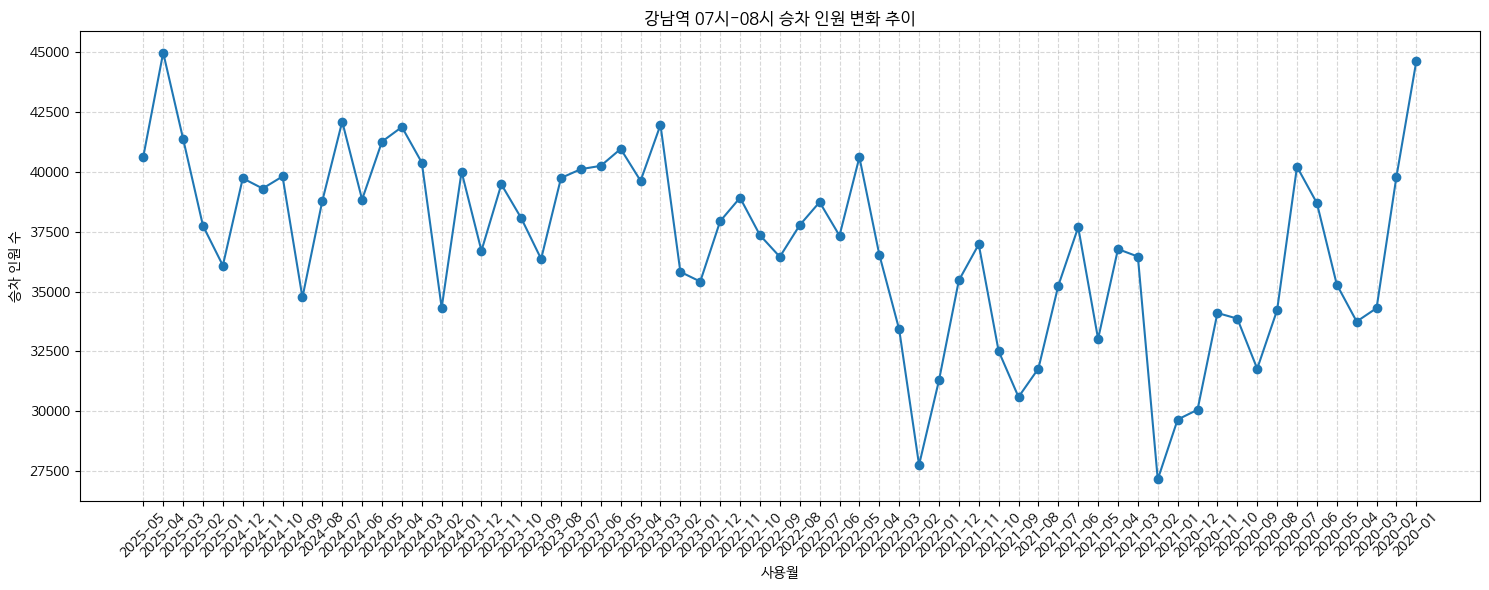

In [107]:
# 강남역만 필터링
ganam = subways_df1[subways_df1['지하철역'] == '강남']

# 시각화
plt.figure(figsize=(15,6))
plt.plot(ganam['사용월'], ganam['07시-08시 승차인원'], marker='o', color='tab:blue')
plt.xticks(rotation=45)
plt.title('강남역 07시-08시 승차 인원 변화 추이')
plt.xlabel('사용월')
plt.ylabel('승차 인원 수')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns